In [20]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [21]:
from psikit import Psikit

In [22]:
pk = Psikit(debug=True, threads=1, memory=12)

In [23]:
pk.read_from_smiles('Cn1cnc2n(C)c(=O)n(C)c(=O)c12')

In [24]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571174689

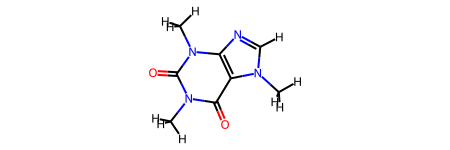

In [25]:
pk.mol

In [26]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.22713007  0.02187137  0.15680415 -0.48628904  0.09957889 -0.01397166
 -0.03402428  0.43812692 -0.54478425 -0.07812578 -0.04207141  0.35361369
 -0.4943972  -0.03873158  0.11841668  0.11841668  0.11841668  0.15065807
  0.06354215  0.06354215  0.06354215  0.0643319   0.0643319   0.0643319 ]
[-0.11403021 -0.69385755  0.38637837 -0.62279357  0.63500104 -0.87752047
 -0.12043108  1.09568242 -0.6272534  -0.87907091 -0.1234413   0.89980363
 -0.63012404  0.09324863  0.16734001  0.16721743  0.12973442  0.18239659
  0.14874578  0.16749096  0.14911672  0.14538446  0.14586305  0.17511901]
[-0.13262835 -0.05225328  0.07496986 -0.27509079  0.13928472 -0.15241614
 -0.13281186  0.34777618 -0.39830939 -0.18932338 -0.13813429  0.29653735
 -0.39548709 -0.1255512   0.11641283  0.11812885  0.10519401  0.12283576
  0.10671874  0.1192356   0.10969519  0.10751033  0.10581842  0.12188792]


In [27]:
mol = pk.mol
atoms = mol.GetAtoms()

In [28]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [29]:
df = pd.DataFrame(data)

In [30]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.227,-0.114,-0.133
1,N,0.022,-0.694,-0.052
2,C,0.157,0.386,0.075
3,N,-0.486,-0.623,-0.275
4,C,0.100,0.635,0.139
5,N,-0.014,-0.878,-0.152
6,C,-0.034,-0.120,-0.133
7,C,0.438,1.096,0.348
8,O,-0.545,-0.627,-0.398
9,N,-0.078,-0.879,-0.189


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
plt.style.use('ggplot')

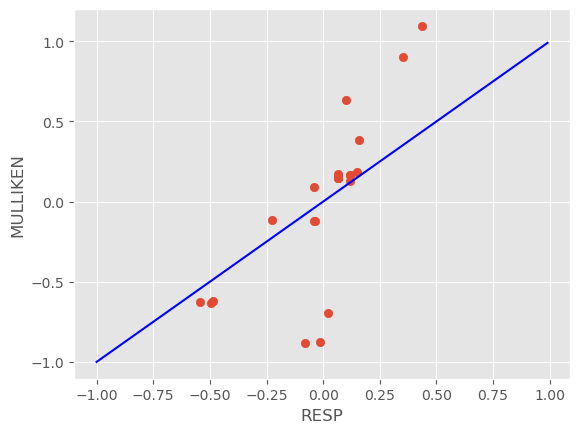

In [33]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

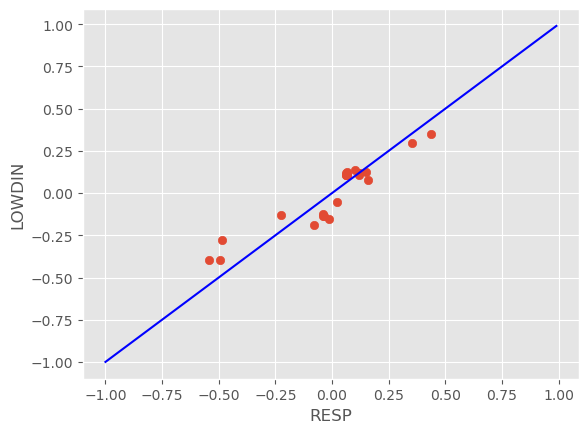

In [34]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

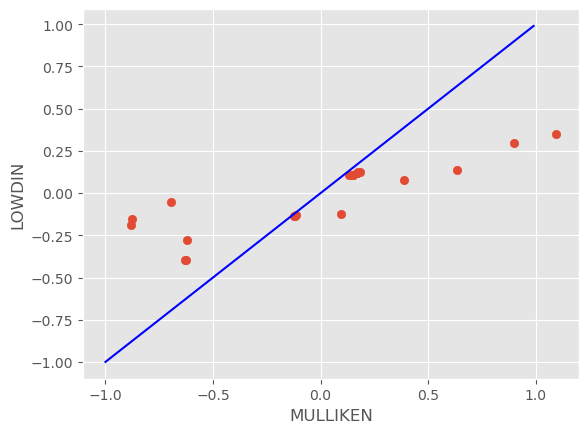

In [35]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')